# Modul NetworkX - teória grafov

Modul NetworkX slúži na vytváranie, manipuláciu, vykresľovanie a analýzu komplexných sietí.<br>
Je možné ju využiť pri analýze **sociálnych, biologických, či dopravných** sietí a dokáže značne zjednodušiť prácu s veľkými datasetmi.<br>


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### 4 základné typy grafov
**Graph** - neorientovaný graf<br>
**DiGraph** - orientovaný graf, t.j. každá hrana má definovaný smer<br>
**MultiGraph** - neorientovaný graf, v ktorom môže byť dvojica vrcholov spojená viacerými rôznymi hranami<br>
**MultiDiGraph** - orientovaný multigraf

In [60]:
# vytvorenie grafu
graf = nx.Graph()
digraf = nx.DiGraph()
multigraf = nx.MultiGraph()
multidigraf = nx.MultiDiGraph()

### Definovanie a manipulácia grafu

Vrcholmi grafu môžu byť: primitívne typy, iné grafy, súbory, funkcie...<br>
Hrany grafu sú určené dvojicou koncových vrcholov.

##### 1. Reprezentácia grafu zoznamom hrán

In [ ]:
# pridaním hrany definovanej dvojicou koncových vrcholov sú zároveň definované dané vrcholy
graf.add_edge(1, 2)
graf.add_edge(3, 1)
graf.add_edge(1, 'B')

# pridanie ohodnotenej hrany so špeciálnym numerickým atribútom weight
graf.add_edge(2, 3, weight=0.9)
graf.add_edge('Hello, world!', 'B')

# pridanie množiny všetkých hrán iného grafu
graf2 = nx.from_edgelist(graf.edges)
graf2.add_edge('C', 'C')

# pridanie samostatného vrcholu
graf2.add_node(print)

# priradenie ľubovoľných atribútov k vybraným vrcholom
graf2.add_node('C', pravda=True)
graf2.nodes[2]['čas'] = 17
graf2.nodes[print]['funkcia'] = 'výpis'
print(graf2.nodes.data())

# vykreslenie grafu a ukážka formátovania
nx.draw(graf2, with_labels=True, node_size=800, node_color='#e88ecb', node_shape='p', edge_color='#822865', width=1.5, font_color='#851962')
plt.show()

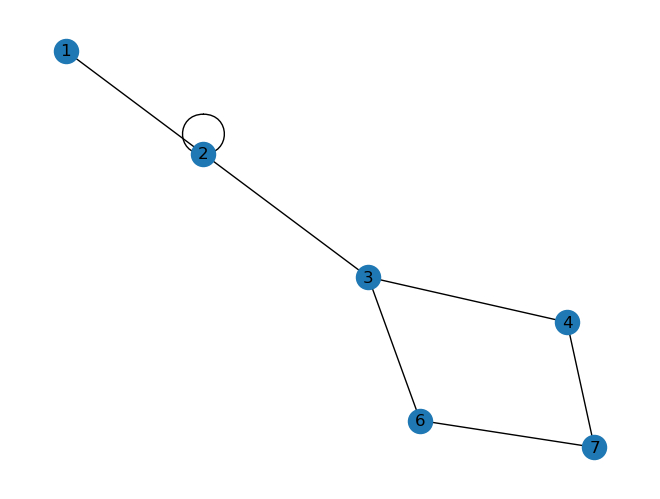

In [4]:
# vytvorenie grafu definovaného zoznamom hrán
edge_list = [(1, 2), (2, 2), (2, 3), (3, 4), (3, 6), (4, 7), (6, 7)]
graf = nx.from_edgelist(edge_list)

# alternatíva: pridanie hrán zo zoznamu do existujúceho grafu
# graf.add_edges_from(edge_list)

nx.draw(graf, with_labels=True)
plt.show()

##### 2. Reprezentácia grafu maticou susednosti

In [5]:
# vytvorenie matice susednosti z existujúceho grafu
print(nx.adjacency_matrix(graf))

  (0, 1)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 2)	1
  (3, 5)	1
  (4, 2)	1
  (4, 5)	1
  (5, 3)	1
  (5, 4)	1


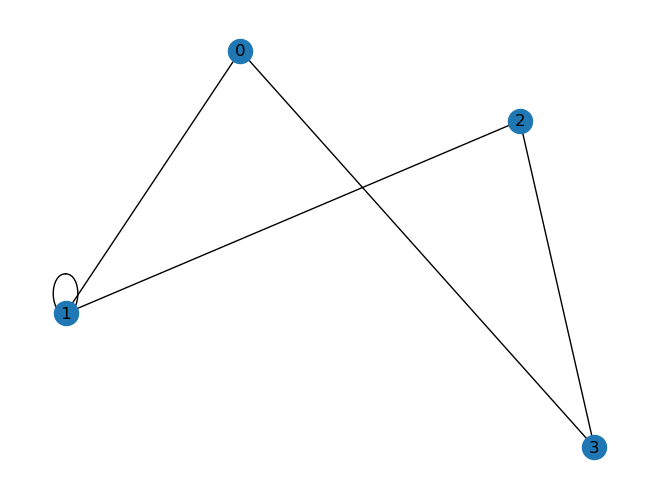

In [6]:
# vytvorenie grafu z matice susednosti danej napríklad np-arrayom
graf = nx.from_numpy_array(np.array([[0, 1, 0, 1],
                                     [1, 1, 1, 0],
                                     [0, 1, 0, 1],
                                     [1, 0, 1, 0]]))
nx.draw(graf, with_labels=True)
plt.show()

##### Základné informácie o štruktúre grafu

In [7]:
# zoznam vrcholov
print(list(graf2.nodes))

# zoznam hrán
print(list(graf2.edges))

# zoznam susedných vrcholov
print(list(graf2.adj))

# počet vrcholov
print(graf2.number_of_nodes())

# počet hrán
print(graf2.number_of_edges())

[1, 2, 3, 'B', 'Hello, world!', 'C', <built-in function print>]
[(1, 2), (1, 3), (1, 'B'), (2, 3), ('B', 'Hello, world!'), ('C', 'C')]
[1, 2, 3, 'B', 'Hello, world!', 'C', <built-in function print>]
7
6


##### Odstránenie prvkov grafu

In [8]:
# odstránenie vybraných vrcholov
graf2.remove_node(2)
graf2.remove_nodes_from('Odstráň B')
print(list(graf2.nodes))

# odstránenie vybraných hrán
graf2.remove_edge(1, 3)
print(list(graf2.edges))

# odstránenie všetkých vrcholov a hrán grafu
graf2.clear()

[1, 3, 'Hello, world!', 'C', <built-in function print>]
[('C', 'C')]


##### Úplný graf o n vrcholoch

Všetky vrcholy sú vzájomne prepojené.

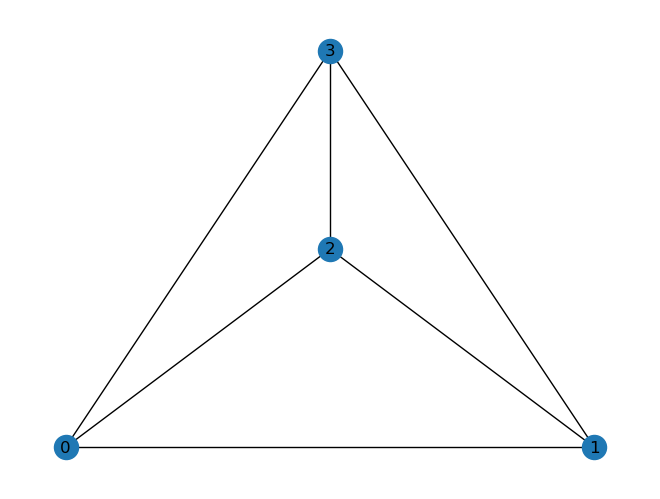

In [9]:
graf = nx.complete_graph(4)
nx.draw_planar(graf, with_labels=True)
plt.show()

##### Úplný bipartitný graf (n1, n2)

Vrcholy 0 až (n1 - 1) sú v prvej partícii, vrcholy n1 až (n1 + n2 - 1) sú v druhej partícii. Každý vrchol z prvej partície je spojený s každým vrcholom z druhej partície.

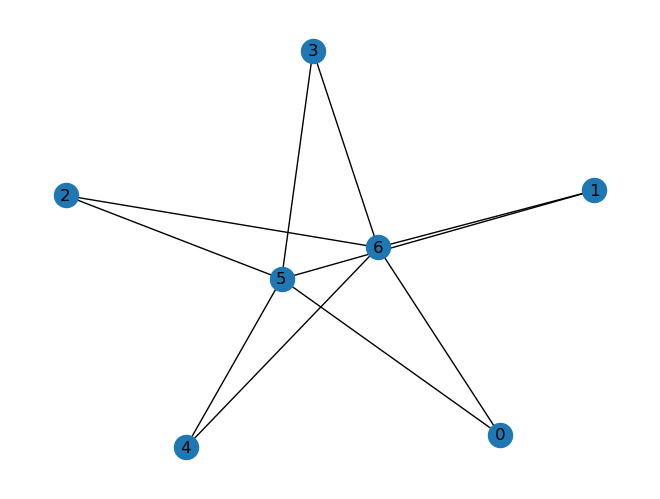

In [10]:
graf = nx.complete_bipartite_graph(5, 2)
nx.draw(graf, with_labels=True)
plt.show()

### Spôsoby vykreslenia grafu

- **draw_circular** = usporiadanie vrcholov do tvaru kružnice
- **draw_shell** = usporiadenie vrcholov do kocentrických kružníc
- **draw_spectral** = usporiadenie vrcholov na základe Laplaceovej matice
- **draw_random** = náhodné usporiadenie vrcholov
- **draw_planar** = usporiadenie vrcholov tak, aby sa žiadne hrany nepretínali (ak je to možné, t.j. jedná sa o rovinný graf)

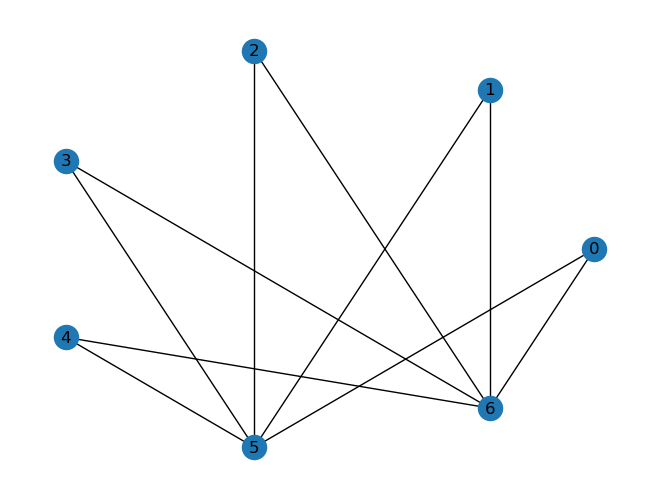

In [11]:
nx.draw_circular(graf, with_labels=True)
plt.show()

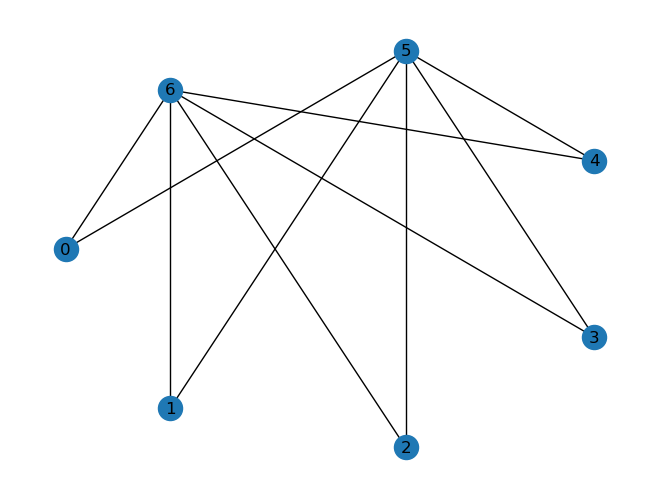

In [12]:
nx.draw_shell(graf, with_labels=True)
plt.show()

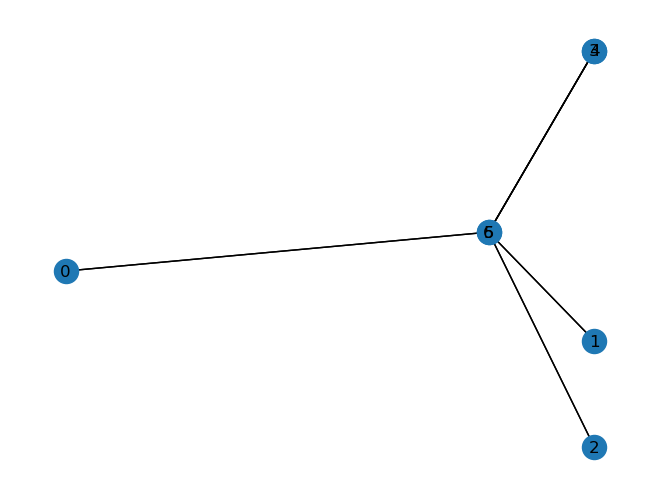

In [13]:
nx.draw_spectral(graf, with_labels=True)
plt.show()

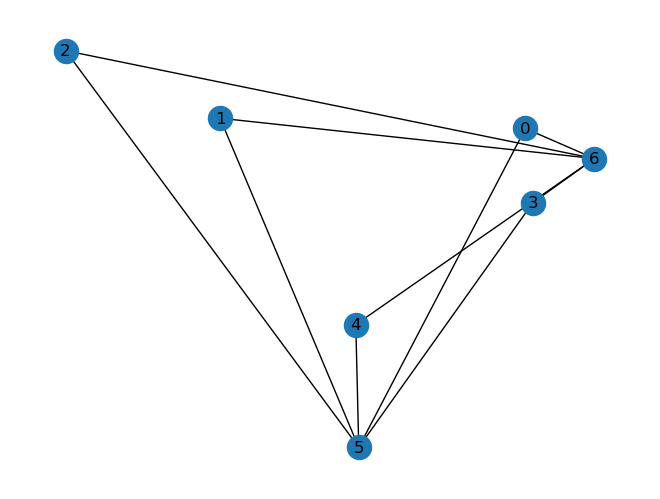

In [14]:
nx.draw_random(graf, with_labels=True)
plt.show()

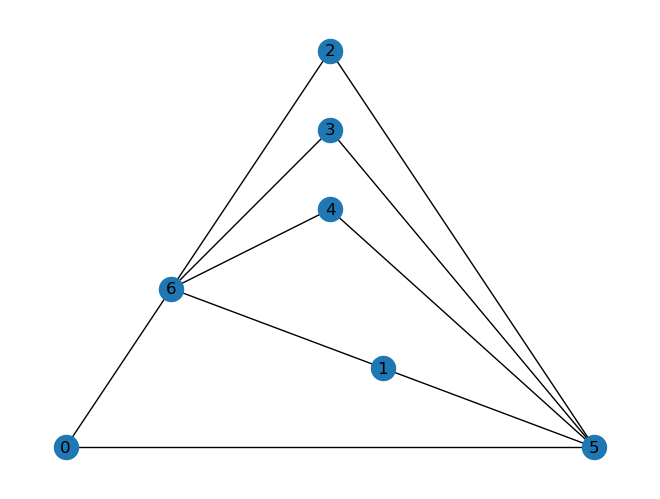

In [15]:
nx.draw_planar(graf, with_labels=True)
plt.show()

### Najkratšia cesta

Vstavaný algoritmus na nájdenie najkratšej cesty medzi dvoma bodmi.<br>
V neohodnotenom grafe má každá hrana hodnotu 1.

[2, 4, 'X', 'A', 'C']
4
[2, 4, 'X', 'A', 'C']


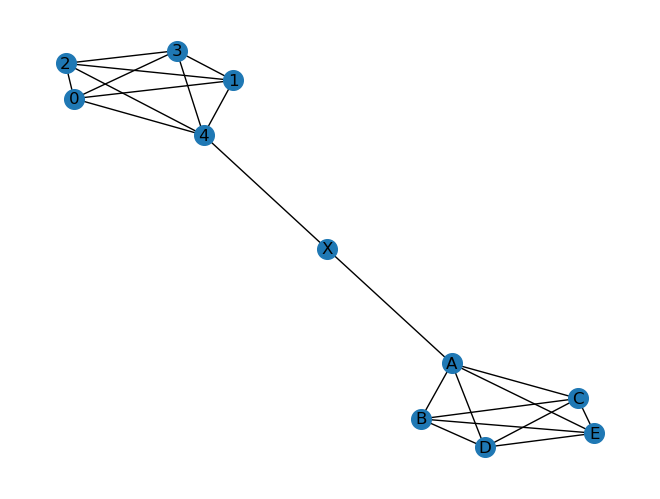

In [3]:
g1 = nx.complete_graph(5)
g2 = nx.complete_graph(5)
g2 = nx.relabel_nodes(g2, {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'})
spoj_list = [(4, 'X'), ('X', 'A')]
g_spoj = nx.from_edgelist(spoj_list)  # most medzi komponentmi g1 a g2

# skombinovanie grafov do jedného celku
graf = nx.compose_all([g1, g2, g_spoj])

# najkratšia cesta medzi bodmi 2 a C
print(nx.shortest_path(graf, 2, 'C'))
# dĺžka najkratšej cesty
print(nx.shortest_path_length(graf, 2, 'C'))

# nájdenie najkratšej cesty medzi dvomi bodmi použitím A* "A star" algoritmu
print(nx.astar_path(graf, 2, 'C'))

nx.draw(graf, with_labels=True, node_size=200)
plt.show()

### Eulerovský ťah

Vstavaný algoritmus na nájdenie ťahu, ktorý každou hranou prejde práve raz.

In [4]:
if (nx.has_eulerian_path(graf)):
    print(list(nx.eulerian_path(graf)))

[(4, 0), (0, 1), (1, 2), (2, 0), (0, 3), (3, 1), (1, 4), (4, 2), (2, 3), (3, 4), (4, 'X'), ('X', 'A'), ('A', 'B'), ('B', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'B'), ('B', 'E'), ('E', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A')]


### Úloha obchodného cestujúceho (TSP)

Heuristický algoritmus na nájdenie najkratšieho možného sledu, ktorý prejde všetkými vrcholmi grafu a vráti sa do vrchola, v ktorom začal.

In [10]:
print(list(nx.approximation.traveling_salesman_problem(graf)))

[0, 3, 2, 4, 'X', 'A', 'E', 'C', 'D', 'B', 'A', 'X', 4, 1, 0]


### Prehľadávacie algoritmy

**1. Depth First Search** = prehľadávanie do hĺbky

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 'X'), ('X', 'A'), ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')]


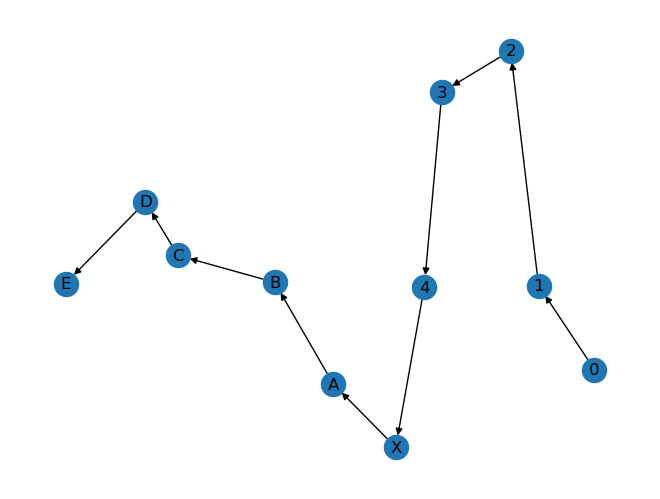

In [145]:
print(list(nx.dfs_edges(graf)))
dfs = nx.dfs_tree(graf)
nx.draw(dfs, with_labels=True)
plt.show()

**2. Breadth First Search** = prehľadávanie do šírky

[(0, 1), (0, 2), (0, 3), (0, 4), (4, 'X'), ('X', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E')]


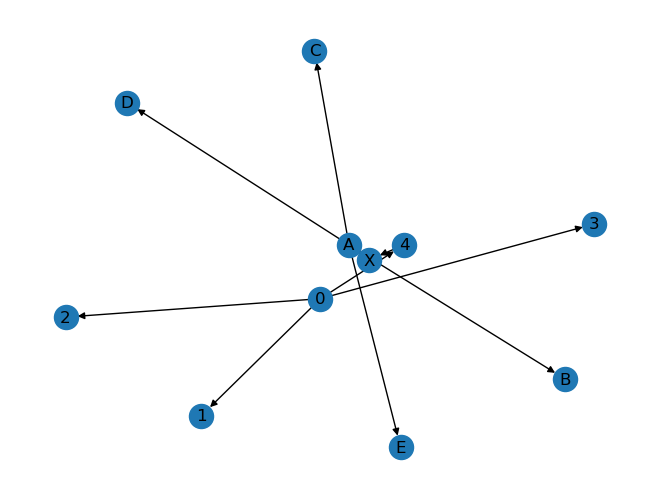

In [146]:
print(list(nx.bfs_edges(graf, 0)))
bfs = nx.bfs_tree(graf, 0)
nx.draw(bfs, with_labels=True)
plt.show()

### Kruskalov algoritmus

Na hľadanie najlacnejšej kostry súvislého grafu.

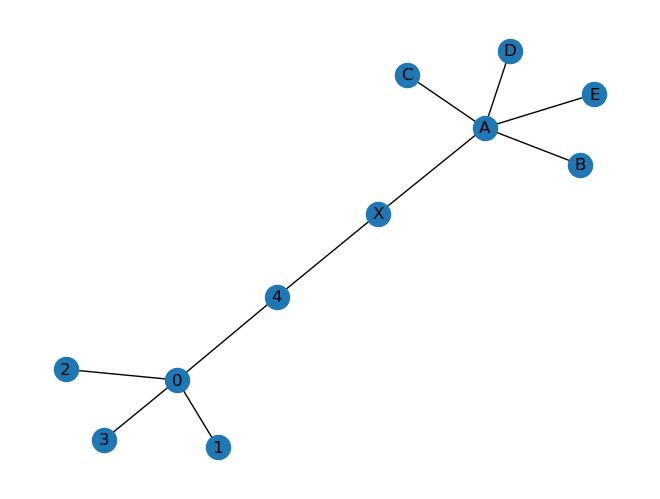

In [147]:
kruskal = nx.minimum_spanning_tree(graf)
nx.draw(kruskal, with_labels=True)
plt.show()

### Farbenie

Vyfarbenie všetkých vrcholov grafu použitím čo najmenšieho počtu farieb tak, že žiadne susedná vrcholy nemôžu mať rovnakú farbu.

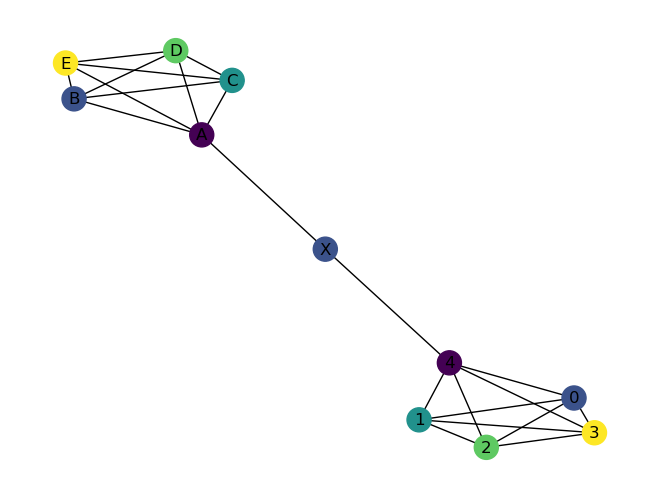

In [148]:
farbenie = nx.greedy_color(graf)
farby_list = []
for vrchol in graf:
    farby_list.append(farbenie[vrchol])
nx.draw(graf, with_labels=True, node_color=farby_list)
plt.show()

### Metriky grafov

**1. centralita** = miera dôležitosti vrchola

{0: 0.4, 1: 0.4, 2: 0.4, 3: 0.4, 4: 0.5, 'A': 0.5, 'B': 0.4, 'C': 0.4, 'D': 0.4, 'E': 0.4, 'X': 0.2}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.5333333333333333, 'A': 0.5333333333333333, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'X': 0.5555555555555556}


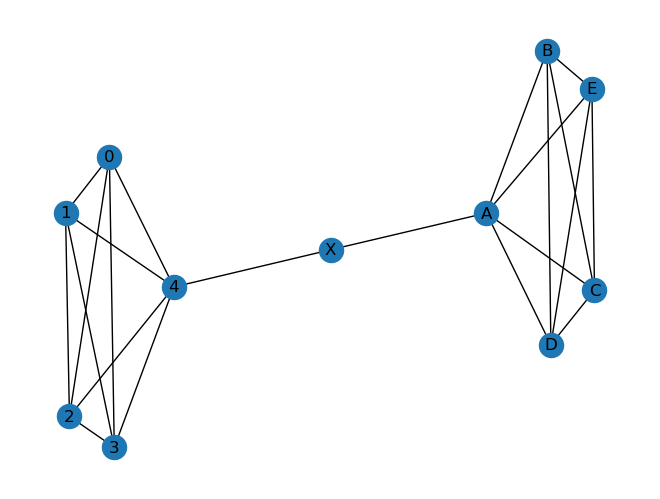

In [88]:
# centralita na základe stupňa vrchola
print(nx.degree_centrality(graf))

# centralita na základe počtu najkratších ciest prechádzajúcich vrcholom
print(nx.betweenness_centrality(graf))

nx.draw(graf, with_labels=True)
plt.show()

**2. hustota** = podiel počtu skutočných hrán a počtu hrán úplného grafu pri danom počte vrcholov

In [19]:
print(round(nx.density(graf) * 100), '%')

40 %


**3. polomer** = dĺžka najdlhšej z najkratších ciest

In [20]:
print(nx.diameter(graf))

4


##### Maximálna podmnožina vrcholov, ktoré sú si vzájmne susedné

In [21]:
print(list(nx.find_cliques(graf)))

[[4, 0, 1, 2, 3], [4, 'X'], ['E', 'B', 'D', 'C', 'A'], ['A', 'X']]


##### Mosty

[(4, 'X'), ('A', 'X')]
[(4, 'X', 5), (4, 'F', 5), ('A', 'X', 5), ('A', 'H', 5), ('F', 'G', 5), ('G', 'H', 5)]


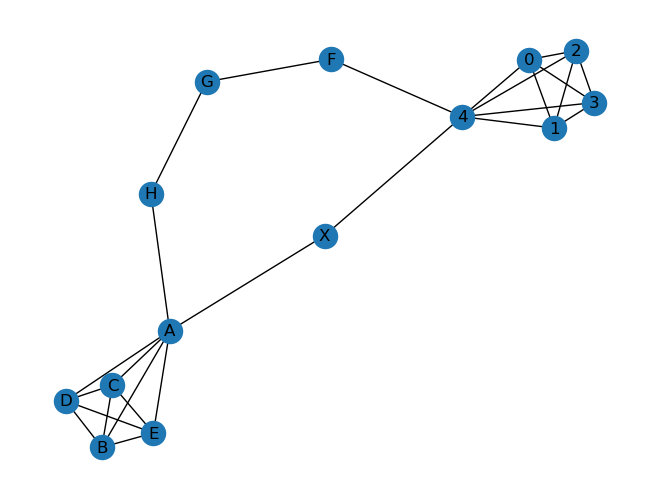

In [22]:
print(list(nx.bridges(graf)))

lokal_mosty_list = [(4, 'F'), ('F', 'G'), ('G', 'H'), ('H', 'A')]
graf = nx.compose_all([graf, nx.from_edgelist(lokal_mosty_list)])

# lokálny most = hrana medzi vrcholmi, ktoré nemajú žiadny spoločný susedný vrchool, ale existuje medzi nimi alternatívna cesta
print(list(nx.local_bridges(graf)))
# vypíše lokálny most a dĺžku najkratšej cesty medzi jeho koncovými bodmi, ak by bol daný most vynechaný

nx.draw(graf, with_labels=True)
plt.show()

##### Komponenty grafu

[{0, 1, 2, 3, 4, 'A', 'E', 'D', 'B', 'X', 'C'}, {'Q', 'V', 'Z', 'Y', 'U'}]


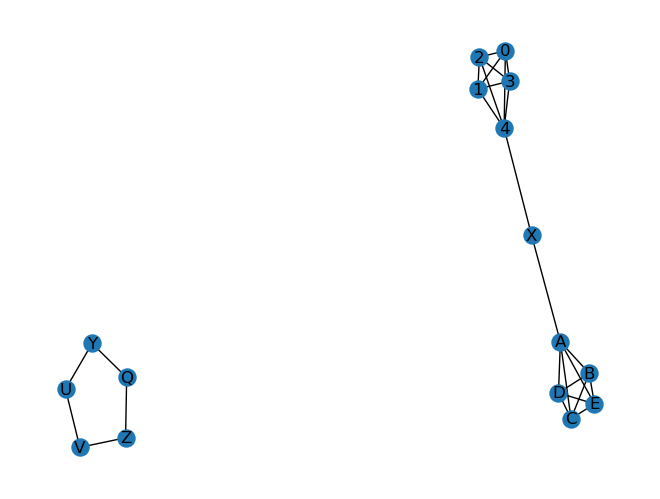

In [90]:
pridavane_list = [('Z', 'Q'), ('Q', 'Y'), ('Z', 'V'), ('V', 'U'), ('U', 'Y')]
graf = nx.compose_all([graf, nx.from_edgelist(pridavane_list)])

# výpis zoznamu súvislých komponentov grafu
print(list(nx.connected_components(graf)))

nx.draw(graf, with_labels=True, node_size=150)
plt.show()

[{0, 1, 2, 3, 4, 'A', 'E', 'D', 'B', 'X', 'C'}, {'Q', 'V', 'Z', 'Y', 'U'}]


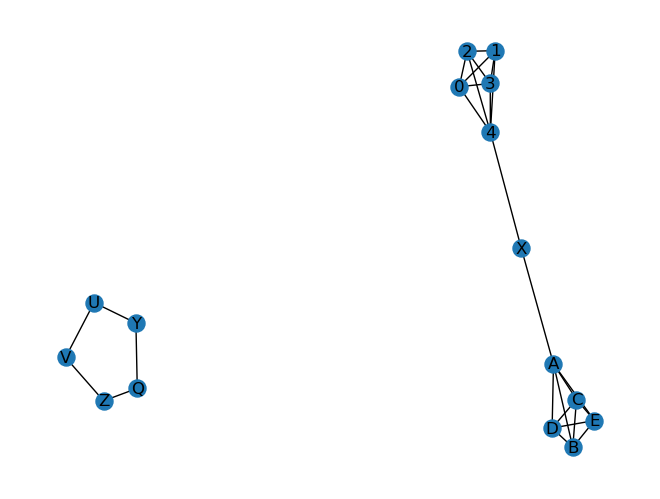

In [92]:
graf.remove_edges_from(lokal_mosty_list)
graf.remove_nodes_from('FGH')

print(list(nx.connected_components(graf)))

nx.draw(graf, with_labels=True, node_size=150)
plt.show()

### Vlastnosti digrafov

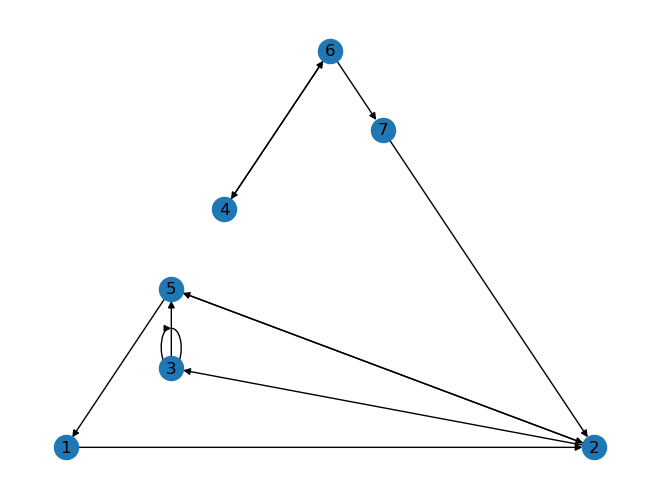

In [123]:
# vytvorenie digrafu daného zoznamom hrán
edge_list = [(1, 2), (2, 3), (2, 5), (3, 3), (3, 5), (4, 6), (5, 1), (5, 2), (6, 7), (6, 4), (7, 2)]
digraf.add_edges_from(edge_list)
nx.draw_planar(digraf, with_labels=True)
plt.show()

In [124]:
# stupeň vrchola 5 (vstupný + výstupný)
print(dict(digraf.degree)[5])

# vstupný stupeň vrchola 5
print(dict(digraf.in_degree)[5])

# výstupný stupeň vrchola 5
print(dict(digraf.out_degree)[5])

4
2
2


In [125]:
# rozdelenie digrafu do slabo súvislých komponentov (orientácia hrán sa neberie do úvahy)
print(list(nx.weakly_connected_components(digraf)))

# rozdelenie digrafu do silne súvislých komponentov (zohľadňuje sa orientácia hrán)
print(list(nx.strongly_connected_components(digraf)))

[{1, 2, 3, 4, 5, 6, 7}]
[{1, 2, 3, 5}, {7}, {4, 6}]


### Operácie s grafmi

**Podgraf** indukovaný množinou vrcholov

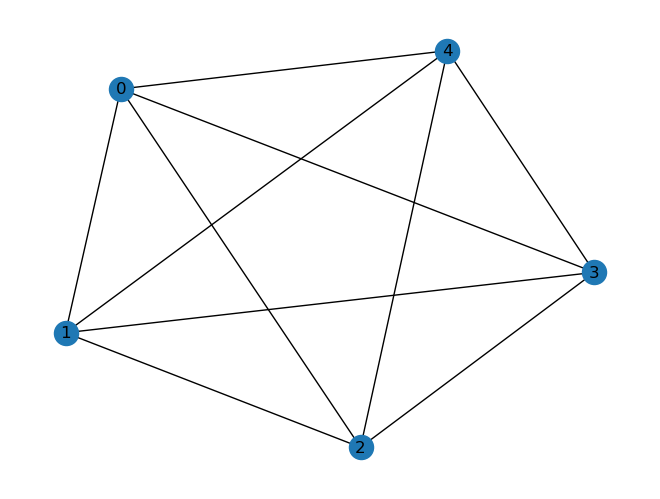

In [39]:
podgraf = nx.subgraph(graf, [0, 1, 2, 3, 4])
nx.draw(podgraf, with_labels=True)
plt.show()

**Zjednotenie** dvoch grafov

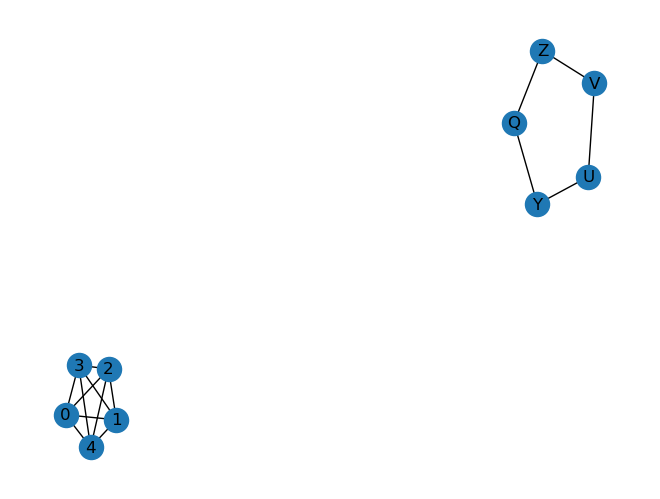

In [40]:
podgraf2 = nx.subgraph(graf, ['Q', 'U', 'V', 'Y', 'Z'])

zjednotenie = nx.union(podgraf, podgraf2)
nx.draw(zjednotenie, with_labels=True)
plt.show()

**Zjednotenie** dvoch grafov s niektorými rovnako pomenovanými vrcholmi => automaticky sa premenujú, aby boli jedinečné

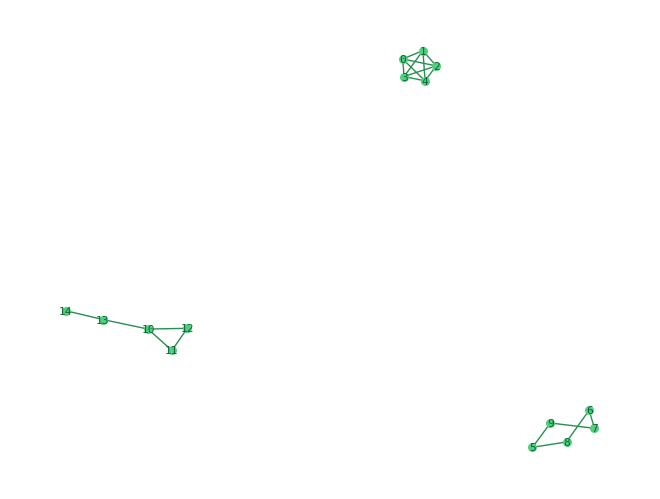

In [83]:
zjednotenie2 = nx.disjoint_union(zjednotenie, graf)
nx.draw(zjednotenie2, with_labels=True, node_size=30, node_color='#51cf81', edge_color='#298f50', font_color='#136131', font_family='monospace', font_size=8)
plt.show()

**Karteziánsky súčin** dvoch grafov

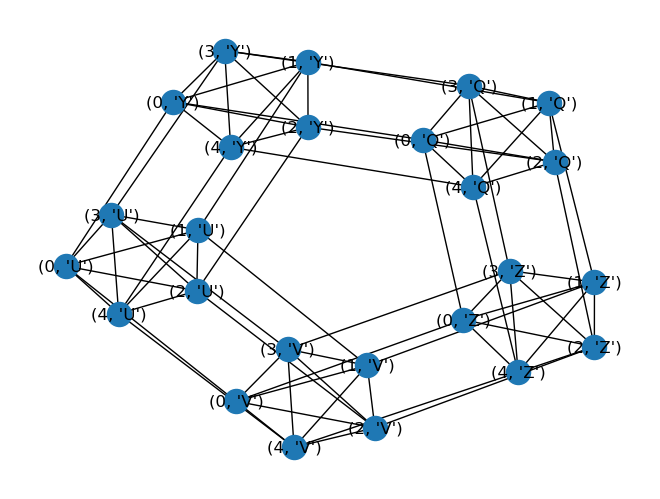

In [42]:
karteziansky_sucin = nx.cartesian_product(podgraf, podgraf2)
nx.draw(karteziansky_sucin, with_labels=True)
plt.show()

**Doplnok** grafu do úplného grafu s daným počtom vrcholov

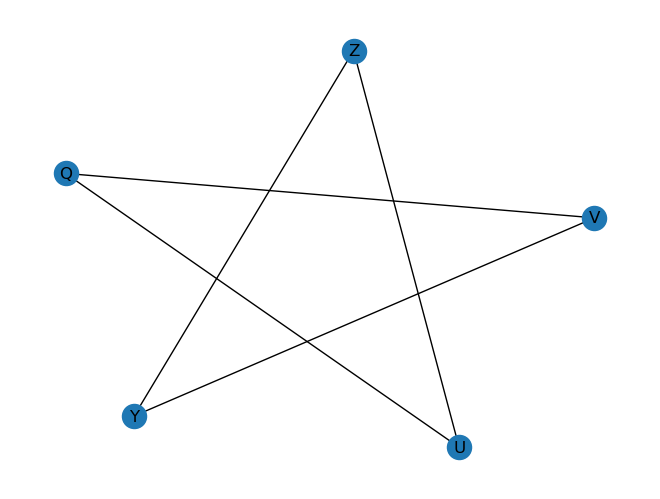

In [45]:
doplnok = nx.complement(podgraf2)
nx.draw(doplnok, with_labels=True)
plt.show()

**Prázdna kópia** grafu so všetkými hranami odstránenými

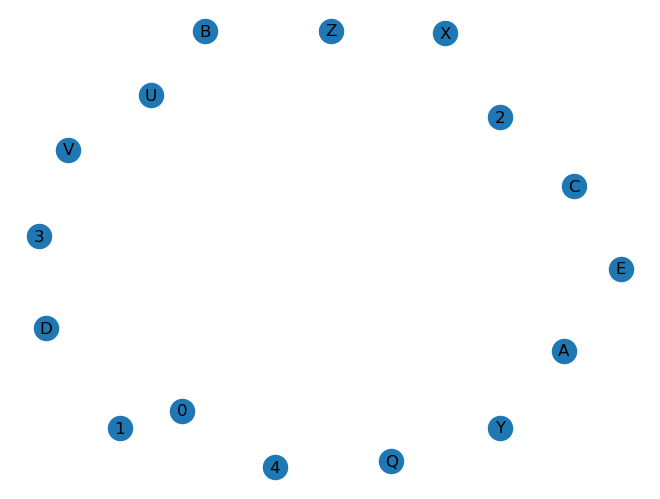

In [46]:
prazdna_kopia = nx.create_empty_copy(graf)
nx.draw(prazdna_kopia, with_labels=True)
plt.show()

Premena **grafu na digraf** - automaticky definuje všetky hrany ako obojsmerné

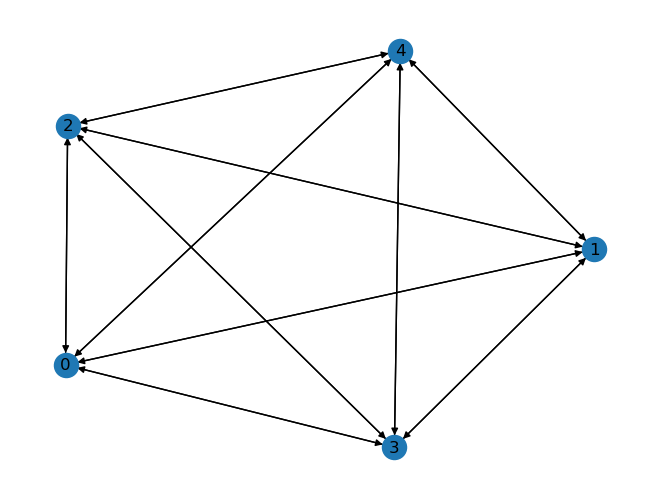

In [48]:
so_smerom = nx.to_directed(podgraf)
nx.draw(so_smerom, with_labels=True)
plt.show()

Premena **digrafu na graf** - odstráni smery a nechá len neorientované hrany

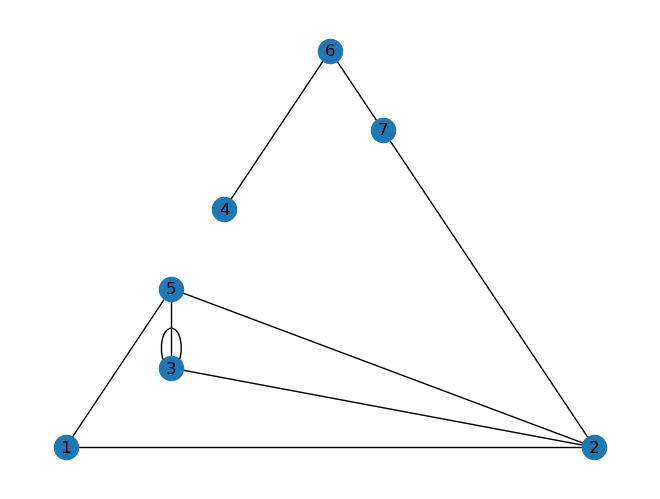

In [50]:
bez_smeru = nx.to_undirected(digraf)
nx.draw_planar(bez_smeru, with_labels=True)
plt.show()